# Image Compression by K-means clustering

In this exercise, you have to perform an image compression of the given picture of New York (New York.jpeg).

To do so, we want to keep not all the possible colors, but only 4.

Thus, you have to perform a clustering algorithm, with K=4, and show the image with those only 4 colors.

```
🔦 Hint:: An image is composed of pixels. Each pixel is made of 3 channels: Red, Green, Blue (RGB). Those color levels are encoded on 8 bits, meaning they are in the range [0-255]. For example, a pixel with this RGB color : (0, 0, 255) will be a very strong blue pixel.

```

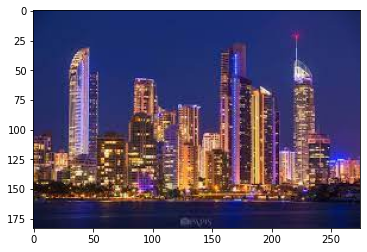

In [6]:
%matplotlib inline
# TODO: Load and review the image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#read and show jpeg image
image = plt.imread("goldcoast.jpeg")
plt.imshow(image)
plt.show()

In [7]:
# TODO: Reshape the image for k-means clustering
#reshape image int 2D array for color channels
image_reshape = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
print("image: {}".format(image.shape))
print("image reshape: {}".format(image_reshape.shape))

image: (183, 275, 3)
image reshape: (50325, 3)


In [8]:
# TODO: Run k-means clustering on reshaped image
#set clusters k to 4
k = 4
#use KMeans model to cluster data 
modele_km = KMeans(n_clusters = k, random_state = 0, verbose = 0)
#fit data to model
modele_km.fit(image_reshape)

KMeans(n_clusters=4, random_state=0)

In [9]:
# TODO: Print cluster centers and construct compressed image
#set palette to 4 dominanet colors identified by cluster centers
palette = modele_km.cluster_centers_
#compress image to utilise only palette rgb values for clusters
compressed_image = palette[modele_km.labels_]
#print palette colors
print("Palette: \n", palette)
print("\nCompressed Image: {}".format(compressed_image.shape))

Palette: 
 [[ 48.01497745  30.90273168  47.78818824]
 [127.93257735  85.61826698  82.55910267]
 [ 38.14863282  46.82761824 112.35845551]
 [200.09873729 156.50315679 148.53717994]]

Compressed Image: (50325, 3)


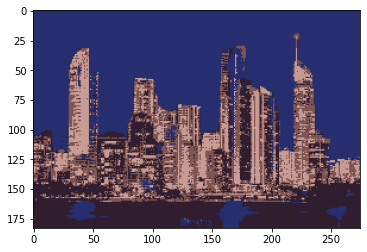

In [10]:
# TODO: Show the compressed image
#reshape image back to original dimensions
compressed_image = compressed_image.reshape(image.shape[0], image.shape[1], image.shape[2])
#show compressed image with normalised RGB values
plt.imshow(compressed_image/255.)
plt.show()